In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Load Train Dataset

In [39]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [40]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
df.shape

(1460, 81)

In [42]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Train/Validation Dataset Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Define some constants
SPLIT_RANDOM_STATE=42
SPLIT_TEST_SIZE=0.2

In [45]:
train, test = train_test_split(df, test_size=SPLIT_TEST_SIZE, random_state=SPLIT_RANDOM_STATE)

In [46]:
train.shape, test.shape

((1168, 81), (292, 81))

In [47]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [48]:
# Split train and test datasets into X feature values and y target values that I want to predict
# I am not modifying train dataset on purpose to use it later
X_train = train.loc[:, train.columns != "SalePrice"].copy()
y_train = train["SalePrice"].copy()

In [49]:
X_test = test.loc[:, train.columns != "SalePrice"].copy()
y_test = test["SalePrice"].copy()

In [50]:
# Remove ID column
X_train.drop(columns=["Id"], inplace=True)
X_test.drop(columns=["Id"], inplace=True)

In [51]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal


In [52]:
y_train.head()

254     145000
1066    178000
638      85000
799     175000
380     127000
Name: SalePrice, dtype: int64

# Find Categorical and Numerical features

In [53]:
# Split features into Numerical and Categorical sets
# I am assuming that every object type feature is some category and everything else is a numerical value
feat_cat = [feat for feat in X_train.columns if X_train[feat].dtype == "object"]
feat_num = [feat for feat in X_train.columns if X_train[feat].dtype != "object"]

In [54]:
feat_cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [55]:
feat_num

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

# Cleaning

In [56]:
NA_COLUMN_DROP_THRESHOLD = 0.55

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

# Part of model pipeline, fills NA values with mode or median and drops columns with high NA content
class NAFiller(BaseEstimator, TransformerMixin):
    def __init__(self, drop_threshold):
        self.drop_threshold = drop_threshold
        self._drop_feats_list = []
        self._cat_feats = []
        self._num_feats = []
        self._fill_na_dict = {}
    
    def fit(self, X, y=None):
        na_dist = X.isna().mean()
        self._mark_feats_to_drop(na_dist)

        # Remaining categorical features
        self._cat_feats = [feat for feat in X.columns if X[feat].dtype == "object" and feat not in self._drop_feats_list]

        # Remaining numerical features
        self._num_feats = [feat for feat in X.columns if X[feat].dtype != "object" and feat not in self._drop_feats_list]

        # Calculate median for every numerical feature
        self._calc_median(X, self._num_feats)

        # Calculate mode for every categorical feature
        self._calc_mode(X, self._cat_feats)
        
        return self

    def _calc_median(self, X, feats):
        for feat in feats:
            self._fill_na_dict[feat] = X[feat].median()

    def _calc_mode(self, X, feats):
        for feat in feats:
            self._fill_na_dict[feat] = X[feat].mode()[0]

    def _mark_feats_to_drop(self, na_dist):
        self._drop_feats_list = [feat for feat, na_ratio in na_dist.items() if na_ratio > self.drop_threshold]
        print("Dropping features", self._drop_feats_list)

    def transform(self, X):
        X = X.copy()
        self._drop_feats(X)
        self._fill_na(X)
        return X

    def _drop_feats(self, X):
        X.drop(columns=self._drop_feats_list, inplace=True)

    def _fill_na(self, X):
        for feat in self._fill_na_dict:
            # print(f"Filling NAs on feature {feat} with {self._fill_na_dict[feat]}")
            X[feat] = X[feat].fillna(self._fill_na_dict[feat])

    @property
    def cat_feats(self):
        return self._cat_feats

    @property
    def num_feats(self):
        return self._num_feats

In [58]:
# Display every feature that contains N/A values
def find_na(dataset):
    na_dist = dataset.isna().mean()
    for feat, na_ratio in na_dist.items():
        if na_ratio > 0:
            print(feat, na_ratio)

In [59]:
find_na(X_train)

LotFrontage 0.1857876712328767
Alley 0.9366438356164384
MasVnrType 0.5847602739726028
MasVnrArea 0.005136986301369863
BsmtQual 0.023972602739726026
BsmtCond 0.023972602739726026
BsmtExposure 0.023972602739726026
BsmtFinType1 0.023972602739726026
BsmtFinType2 0.023972602739726026
Electrical 0.0008561643835616438
FireplaceQu 0.4683219178082192
GarageType 0.0547945205479452
GarageYrBlt 0.0547945205479452
GarageFinish 0.0547945205479452
GarageQual 0.0547945205479452
GarageCond 0.0547945205479452
PoolQC 0.9948630136986302
Fence 0.800513698630137
MiscFeature 0.9606164383561644


In [60]:
na_filler = NAFiller(drop_threshold=NA_COLUMN_DROP_THRESHOLD)
X_train_na_free = na_filler.fit_transform(X_train)

Dropping features ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [61]:
# Should not output anything
find_na(X_train_na_free)

# Plotting feature value distributions

In [62]:
import matplotlib.pyplot as plt

### Target SalePrice distribution

In [63]:
y_train.describe()

count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64

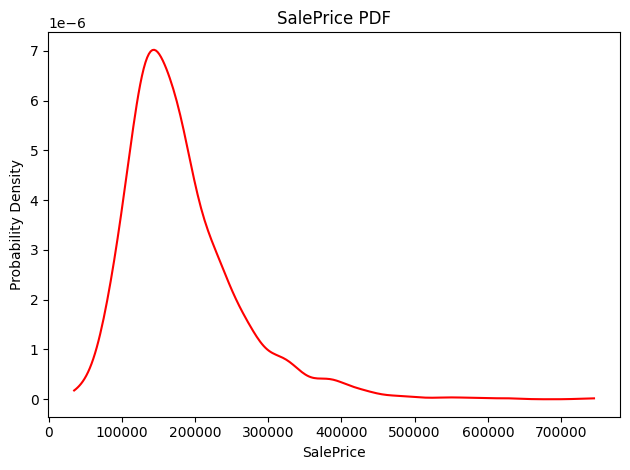

In [64]:
# I needed some way to estimate PDF for SalePrice
# I used gaussian_kde method from scipy library
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
from scipy.stats import gaussian_kde

# Generate 300 sale price values for x axis
saleprice_range = np.linspace(y_train.min(), y_train.max(), 300)
# Probability density values for y axis
prob_density_values = gaussian_kde(y_train).pdf(saleprice_range)

plt.plot(saleprice_range, prob_density_values, color='red')
plt.xlabel('SalePrice')
plt.ylabel('Probability Density')
plt.title('SalePrice PDF')
plt.tight_layout()
plt.show()

In [65]:
# I am using subplot method from matplotlib library to display features nicely
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

def plot_feats(dataset, feats, plot_strategy, plots_per_row=3):
    num_feats = len(feats)
    num_rows = (num_feats + plots_per_row - 1) // plots_per_row
    num_plots = num_rows * plots_per_row

    figsize = (15, 5 * num_rows)
    fig, ax = plt.subplots(num_rows, plots_per_row, figsize=figsize)
    # Convert axes to 1d list
    ax = [ax] if num_plots == 1 else ax.flatten()

    # Plot distributions
    for i, feat in enumerate(feats):
        plot_strategy(vals=dataset[feat], ax=ax[i])
        ax[i].set_title(feat)

    # Disable empty plots
    for i in range(num_feats, num_plots):
        ax[i].axis("off")

    # Draw
    plt.tight_layout()
    plt.show()


# Strategy for plotting categorical features
def plot_cat(vals, ax):
    val_cnt = vals.value_counts()
    val_cnt.plot(kind="bar", color="blue", ax=ax)


# Strategy for plotting numerical features
def plot_num(vals, ax):
    vals.hist(bins=20, color="green", ax=ax)


def plot_scatter(vals, ax):
    # Scatter plot of OverallQual vs SalePrice
    ax.scatter(vals, y_train, color='blue', alpha=0.5)


### Build SalePrice vs Numerical features scatter plot to better understand relations between target and parameters

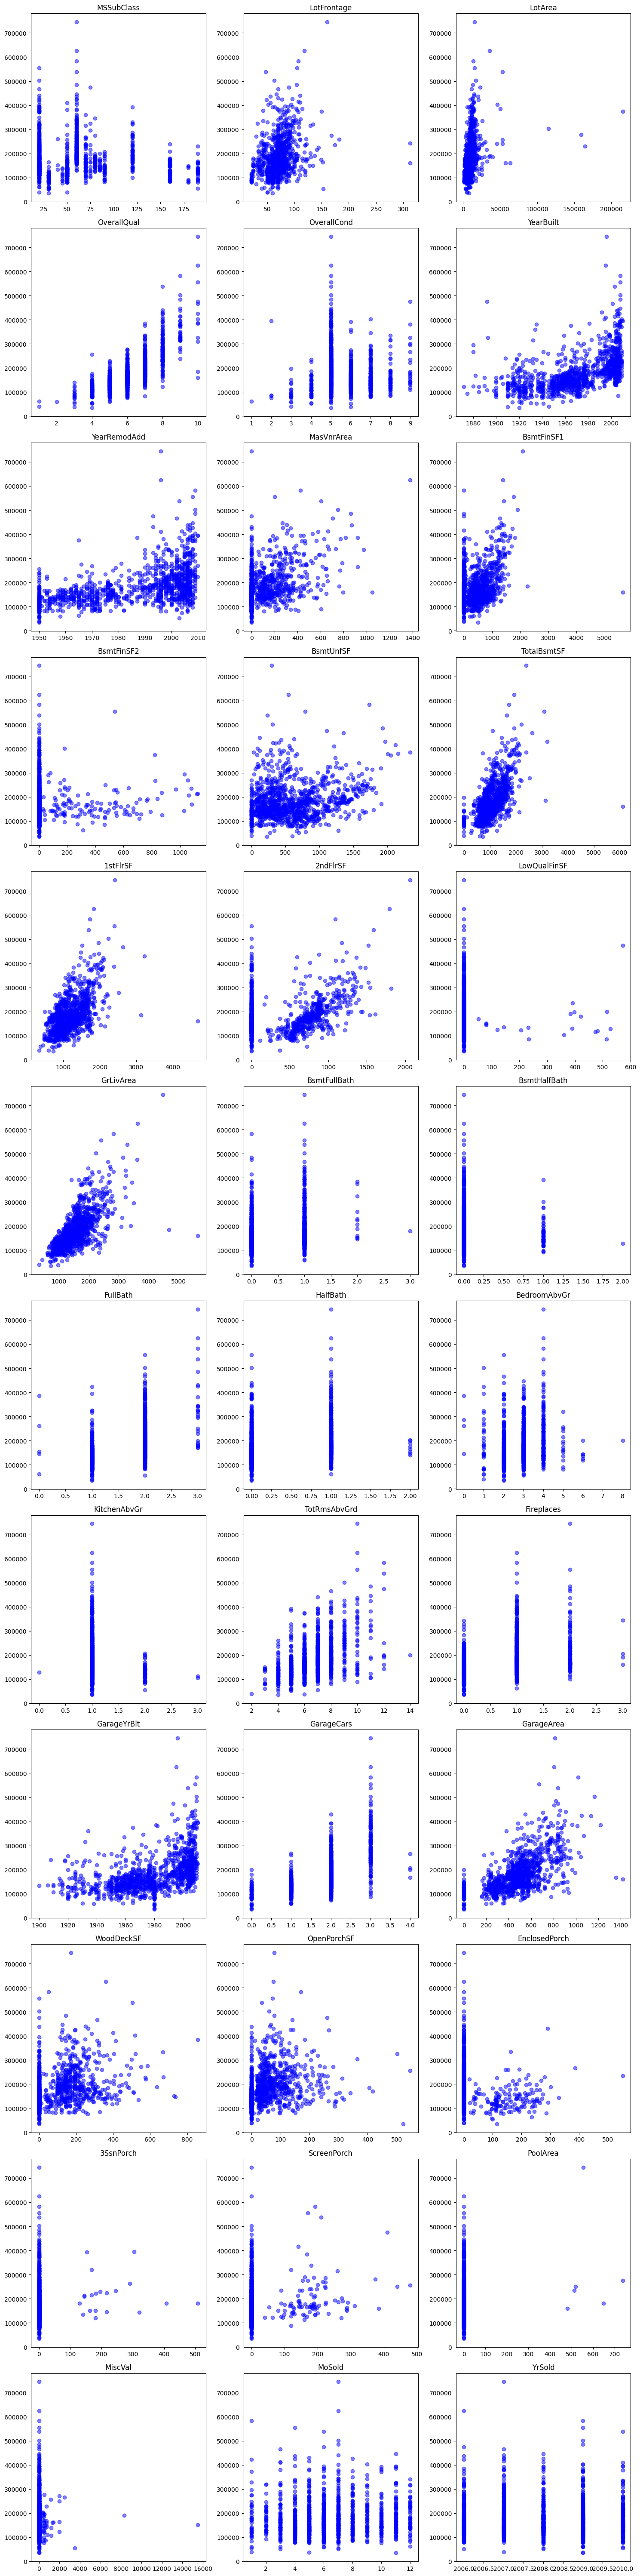

In [66]:
# The following scatter plot will also include NA values depicted as 0 on the x axis
plot_feats(dataset=X_train_na_free, feats=na_filler.num_feats, plot_strategy=plot_scatter)

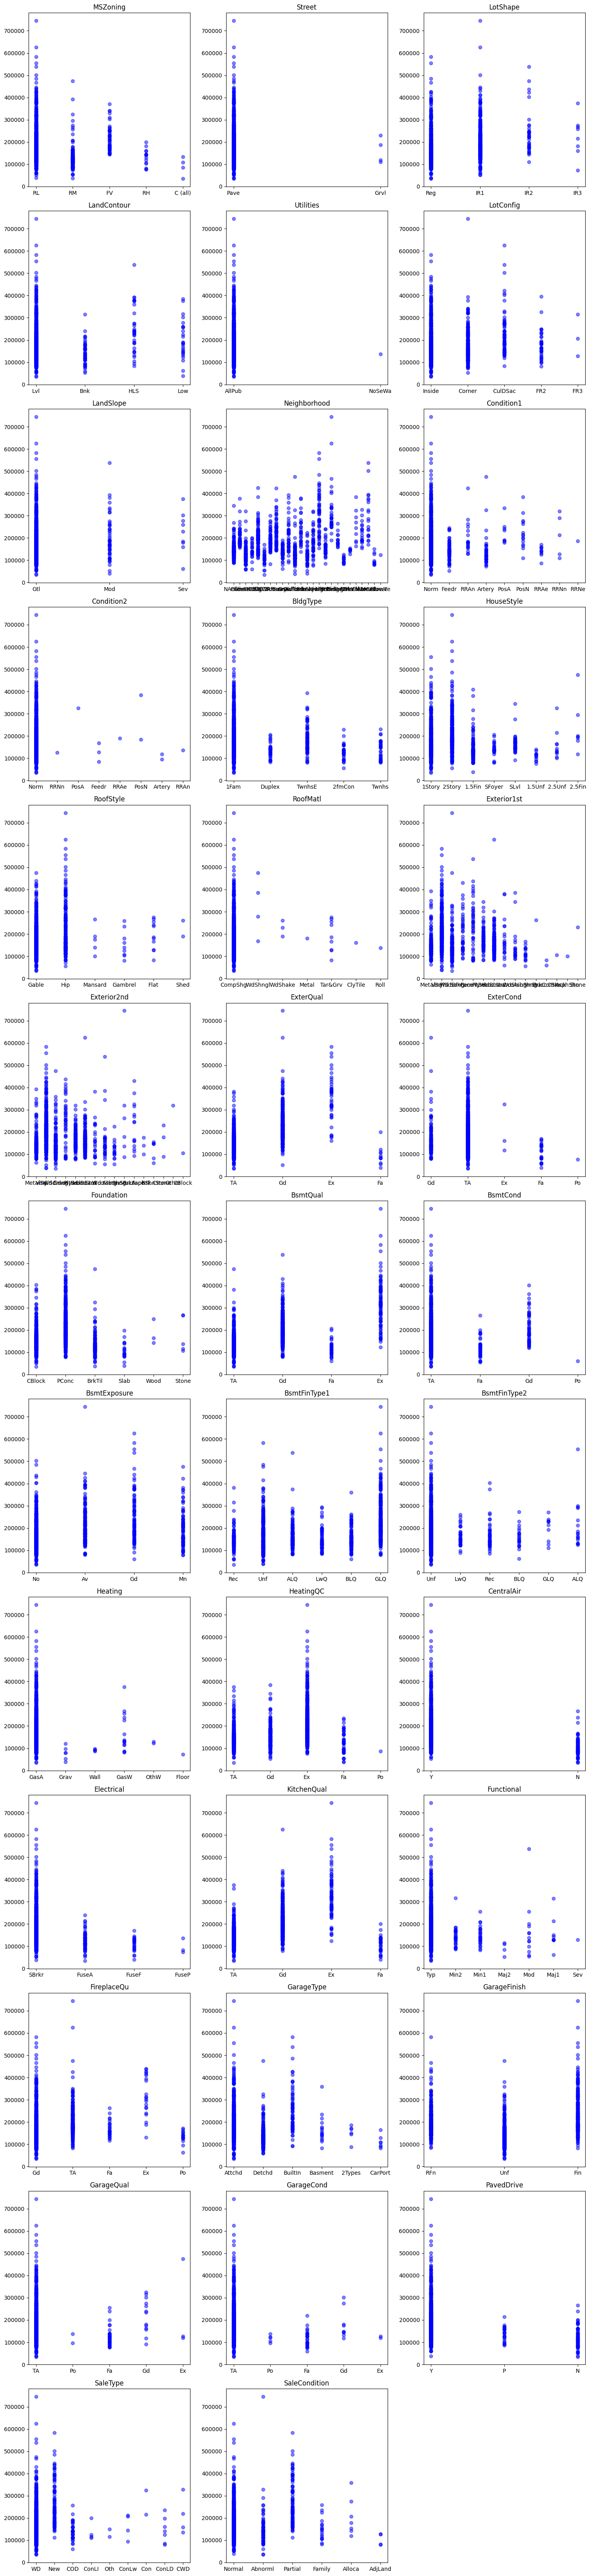

In [67]:
plot_feats(dataset=X_train_na_free, feats=na_filler.cat_feats, plot_strategy=plot_scatter)

### Plot each numerical feature distribution

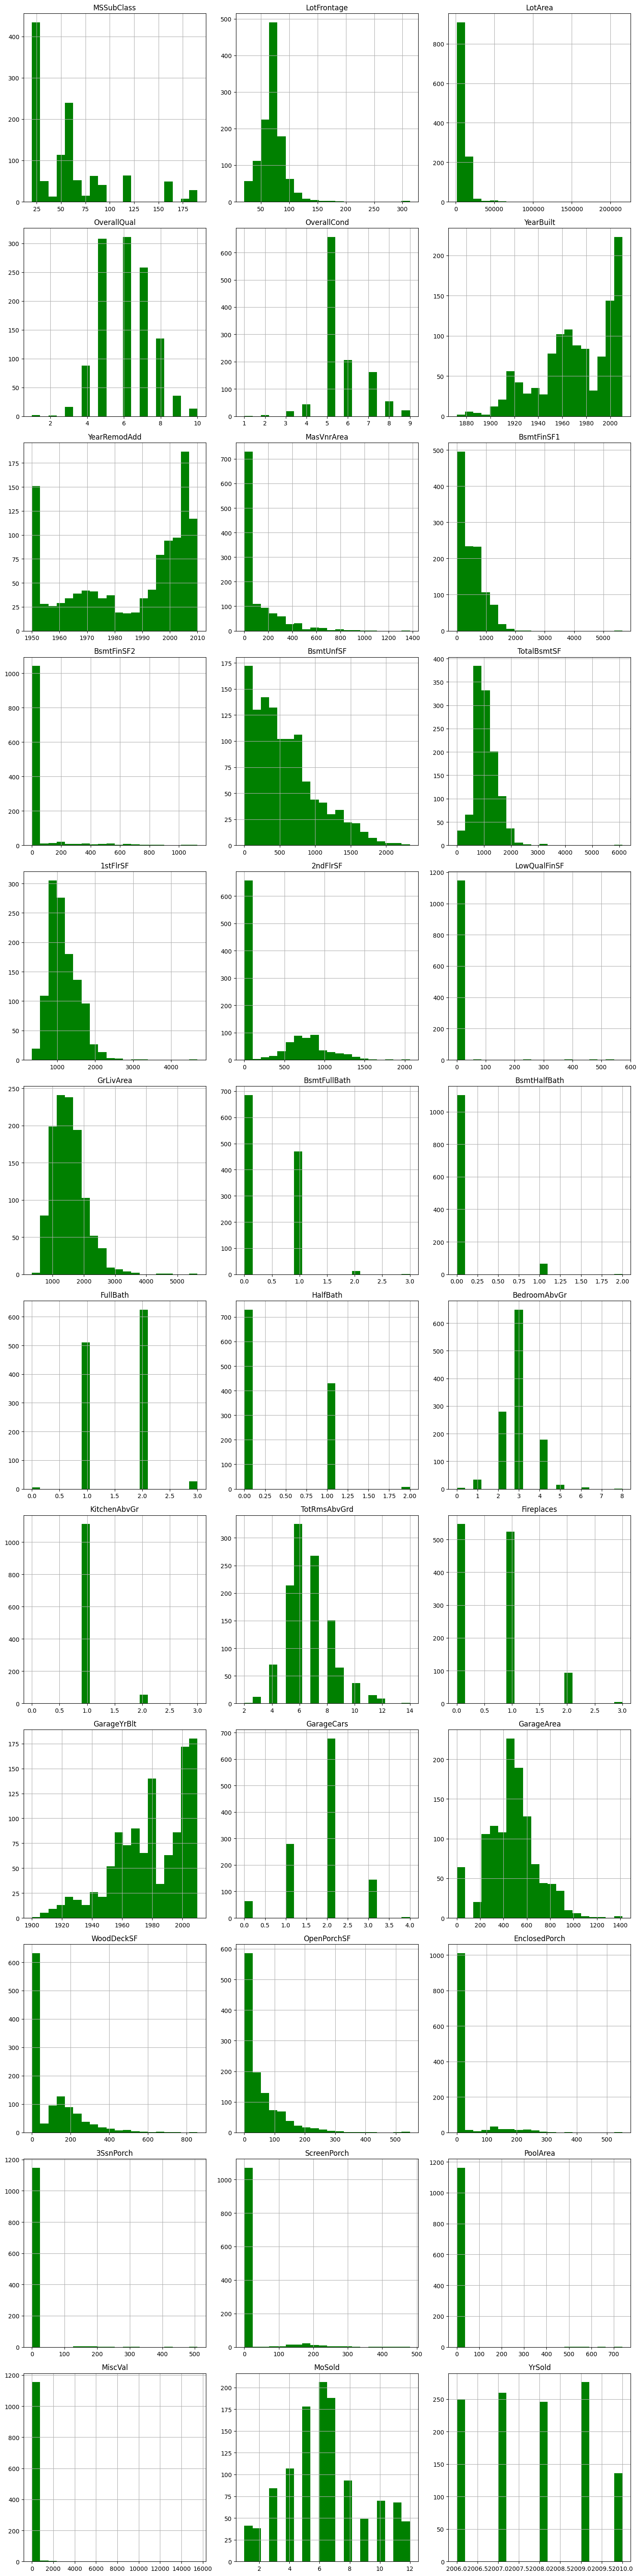

In [68]:
plot_feats(dataset=X_train_na_free, feats=na_filler.num_feats, plot_strategy=plot_num)

### Plot each categorical feature distribution

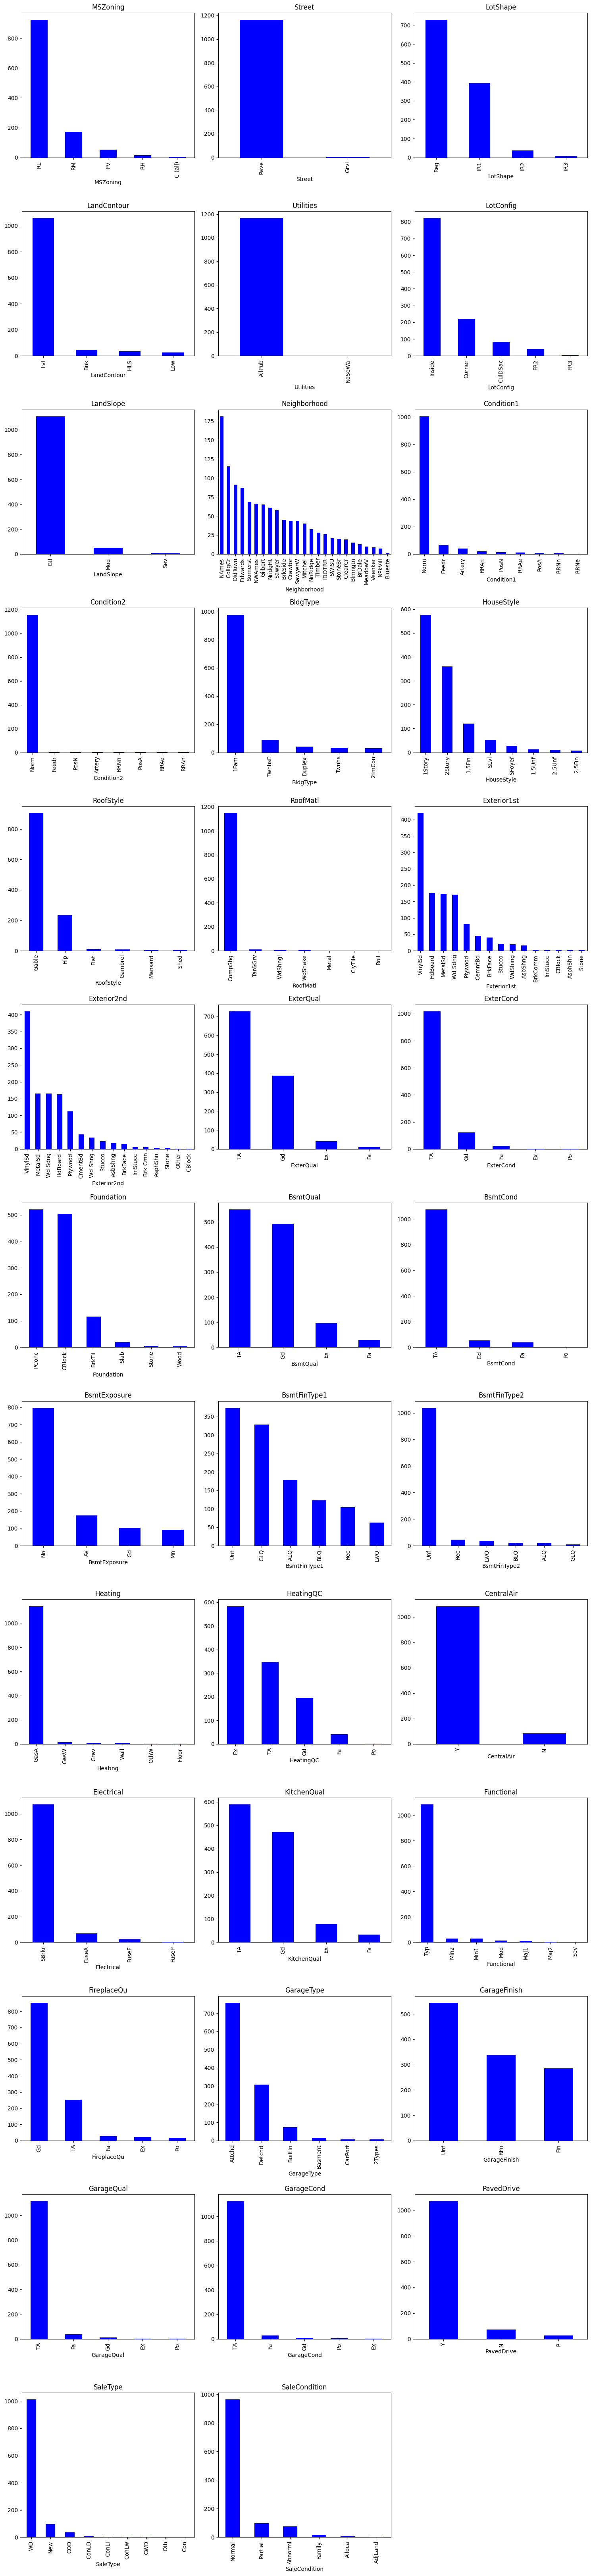

In [69]:
plot_feats(dataset=X_train_na_free, feats=na_filler.cat_feats, plot_strategy=plot_cat)

# Training Functions

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Measures model performance using different metrics for the given dataset
def measure_model_performance(model, X, y):
    # R^2 measures correlation between X and y (higher the better)
    R2 = model.score(X, y)

    # Predict y values
    y_pred = model.predict(X)

    # If prediction is very bad, might predict negative price values
    abnormal_values = 0
    for i, pred_val in enumerate(y_pred):
        if pred_val <= 0:
            abnormal_values += 1
            print(pred_val)
            y_pred[i] = 1

    print("Number of abnormal values: ", abnormal_values)

    # Mean Absolute Error measures on average what is the absolute error (lower the better)
    mae = mean_absolute_error(y, y_pred)

    # Mean Squared Error measures on average what is the squared error, if the error is too high, since
    # MSE function increases faster than MAE, MSE gives you worse score (lower the better)
    mse = mean_squared_error(y, y_pred)

    # Root Mean Squared Error is just square root from MSE, but it may be a better metric, because it is in the same units
    # as SalePrice (lower the better)
    rmse = np.sqrt(mse)

    # Basically same as RMSE but log is taken from y values before calculating RMSE
    rmse_log = 99999999 # means that this metric could not be calculated
    if abnormal_values == 0:
        y_log = np.log(y)
        y_pred_log = np.log(y_pred)
        mse_log = mean_squared_error(y_log, y_pred_log)
        rmse_log = np.sqrt(mse_log)

    # Return metric dict for logging
    return {
        "R2": R2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "RMSE_LOG": rmse_log,
    }

# Dagshub and MLFlow Setup

In [71]:
!pip install mlflow dagshub

In [72]:
import dagshub
dagshub.auth.add_app_token('ed22b8f88bed7c968c7425f62448b33703f4e094')
dagshub.init(repo_owner='vvaza22', repo_name='ml-assignment-1', mlflow=True)

Accessing as vvaza22

Initialized MLflow to track repo "vvaza22/ml-assignment-1"

Repository vvaza22/ml-assignment-1 initialized!

# Pipeline

In [73]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self._selected_features = selected_features

    def fit(self, X, y):
        return self

    def transform(self, X):
        X = X.copy()
        return X[self._selected_features]


In [74]:
from sklearn.preprocessing import OrdinalEncoder

class CategoryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Make sure these columns exist in the transformed result
        self._enforce_cols = []

    def fit(self, X, y=None):
        X = X.copy()
        X = pd.get_dummies(X, columns=['Neighborhood', "HouseStyle"])

        self._enforce_cols += list(X.filter(like="Neighborhood", axis=1).columns)
        self._enforce_cols += list(X.filter(like="HouseStyle", axis=1).columns)
        
        return self

    def transform(self, X):
        X = X.copy()

        self._ord_cat(X, "LandSlope", ["Sev", "Mod", "Gtl"])
        #self._ord_cat(X, "HouseStyle", ["1Story", "1.5Unf", "1.5Fin", "2Story", "2.5Unf", "2.5Fin", "SFoyer", "SLvl"])
        self._ord_cat(X, "ExterQual", ["Po", "Fa", "TA", "Gd", "Ex"])
        self._ord_cat(X, "ExterCond", ["Po", "Fa", "TA", "Gd", "Ex"])
        self._ord_cat(X, "BsmtQual", ["NA", "Po", "Fa", "TA", "Gd", "Ex"])
        self._ord_cat(X, "BsmtCond", ["NA", "Po", "Fa", "TA", "Gd", "Ex"])
        self._ord_cat(X, "BsmtExposure", ["NA", "No", "Mn", "Av", "Gd"])
        self._ord_cat(X, "BsmtFinType1", ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"])
        self._ord_cat(X, "BsmtFinType2", ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"])
        self._ord_cat(X, "HeatingQC", ["Po", "Fa", "TA", "Gd", "Ex"])
        self._ord_cat(X, "CentralAir", ["N", "Y"])
        self._ord_cat(X, "KitchenQual", ["Po", "Fa", "TA", "Gd", "Ex"])
        self._ord_cat(X, "Functional", ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"])
        self._ord_cat(X, "FireplaceQu", ["NA", "Po", "Fa", "TA", "Gd", "Ex"])
        self._ord_cat(X, "GarageFinish", ["NA", "Unf", "RFn", "Fin"])
        self._ord_cat(X, "GarageQual", ["NA", "Po", "Fa", "TA", "Gd", "Ex"])
        self._ord_cat(X, "GarageCond", ["NA", "Po", "Fa", "TA", "Gd", "Ex"])
        self._ord_cat(X, "PavedDrive", ["N", "P", "Y"])

        # PoolQC and Fence were dropped because of high NA content
        # self._ord_cat(X, "PoolQC", ["NA", "Fa", "TA", "Gd", "Ex"])
        # self._ord_cat(X, "Fence", ["NA", "MnWw", "GdWo", "MnPrv", "GdPrv"])

        # One hot encoding
        X = pd.get_dummies(X, columns=['Neighborhood', "HouseStyle"])

        for col in self._enforce_cols:
            if col not in X:
                X[col] = 0
        
        # Drop every categorical feature that was not encoded
        cat_feats = [feat for feat in X.columns if X[feat].dtype == "object"]
        X.drop(columns=cat_feats, inplace=True)

        return X

    def _ord_cat(self, X, feat, order):
        feat_new_name = feat + "Num"
        
        encoder = OrdinalEncoder(categories=[order])

        # Create new feature with the same name + Num string
        X[feat_new_name] = encoder.fit_transform(X[[feat]])

        # Drop original categorical feature in the table
        X.drop(columns=[feat], inplace=True)


In [75]:
cat_encoder = CategoryEncoder()
X_train_encoded = cat_encoder.fit_transform(X_train_na_free)

In [76]:
X_train_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,False,False,False,False,True,False,False,False,False,False
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,False,False,False,False,False,False,False,True,False,False
638,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,False,False,False,False,True,False,False,False,False,False
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,False,False,True,False,False,False,False,False,False,False
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,False,False,True,False,False,False,False,False,False,False


In [77]:
X_train_encoded.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LandSlopeNum', 'ExterQualNum', 'ExterCondNum',
       'BsmtQualNum', 'BsmtCondNum', 'BsmtExposureNum', 'BsmtFinType1Num',
       'BsmtFinType2Num', 'HeatingQCNum', 'CentralAirNum', 'KitchenQualNum',
       'FunctionalNum', 'FireplaceQuNum', 'GarageFinishNum', 'GarageQualNum',
       'GarageCondNum', 'PavedDriveNum', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_Cl

In [78]:
X_train_encoded.filter(like="HouseStyle", axis=1).columns

Index(['HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'HouseStyle_SFoyer', 'HouseStyle_SLvl'],
      dtype='object')

In [79]:
X_train_encoded.filter(like="Neighborhood", axis=1).columns

Index(['Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object')

In [80]:
len(X_train_encoded.columns)

86

In [81]:
encoded_cats = [
    "ExterQualNum",
    "ExterCondNum",
    "BsmtQualNum",
    "BsmtCondNum",
    "HeatingQCNum",
    "CentralAirNum",
    "KitchenQualNum",
    "FunctionalNum",
    "FireplaceQuNum",
    "GarageFinishNum",
    "GarageQualNum",
]

one_hot_cats = [
    'Neighborhood_NAmes',
    'Neighborhood_CollgCr',
    'Neighborhood_OldTown',
    'Neighborhood_Edwards',
    'Neighborhood_Somerst',
    'Neighborhood_NWAmes',
    'Neighborhood_Gilbert',
    'HouseStyle_1.5Fin', 
    'HouseStyle_1Story',
    'HouseStyle_2.5Fin',
    'HouseStyle_2Story',
    'HouseStyle_SFoyer'
]

high_cor = [
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GrLivArea",
]

med_cor = [
    "YearBuilt",
    "YearRemodAdd",
    "BsmtFinSF1",
    "TotRmsAbvGrd",
    "GarageArea",
]


low_cor = [
    "MasVnrArea",
    "GarageYrBlt",
]

params2 = {
    "selected_features": low_cor + med_cor + high_cor + encoded_cats + one_hot_cats,
    "na_drop_threshold": NA_COLUMN_DROP_THRESHOLD,
    "polynomial_degree": 2,
    "regularization_lambda_constant": 5,
    "regularization_method": "ridge",
}

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


def create_pipeline(params):
    pipeline = Pipeline([
        ('na_filler', NAFiller(drop_threshold=params["na_drop_threshold"])),
        ('category_encoder', CategoryEncoder()),
        ('feature_selector', FeatureSelector(params["selected_features"])),
        ('polynomial', PolynomialFeatures(degree=params['polynomial_degree'])),
        ('scaler', StandardScaler()),
        ('model', Ridge(params['regularization_lambda_constant'])),
        #('model', LinearRegression()),
    ])
    return pipeline


pipeline = create_pipeline(params2)

In [83]:
pipeline_model = pipeline.fit(X_train, y_train)

Dropping features ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [84]:
metrics_train_2 = measure_model_performance(pipeline_model, X_train, y_train)
metrics_train_2

Number of abnormal values:  0


{'R2': 0.9539952799446707,
 'MAE': 11440.991665718493,
 'MSE': 274397470.4772502,
 'RMSE': 16564.947041184594,
 'RMSE_LOG': 0.09670877446060204}

In [85]:
metrics_test_2 = measure_model_performance(pipeline_model, X_test, y_test)
metrics_test_2

Number of abnormal values:  0


{'R2': 0.9005346424317933,
 'MAE': 17498.865807335085,
 'MSE': 762931738.8626543,
 'RMSE': 27621.21899668178,
 'RMSE_LOG': 0.14979763950705188}

In [86]:
lambda_consts_train = {}
lambda_consts_test = {}

for l in np.arange(0.0, 15.1, 0.5):
    p = params2.copy()
    p["regularization_lambda_constant"] = l
    pipeline = create_pipeline(p)
    pipeline.fit(X_train, y_train)
    metrics_train = measure_model_performance(pipeline, X_train, y_train)
    metrics_test = measure_model_performance(pipeline, X_test, y_test)
    lambda_consts_train[l] = metrics_train["RMSE_LOG"]
    lambda_consts_test[l] = metrics_test["RMSE_LOG"]

Dropping features ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
Number of abnormal values:  0
-1.1841952534187886e+17
-9.546052010220603e+16
-1.2355883652936814e+17
-1.0845570391768294e+16
-177749.48849102875
-2.8356756102585814e+17
-6.745716203473567e+18
-4.5297808260747014e+17
-3.29891692834525e+16
Number of abnormal values:  9
Dropping features ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
Number of abnormal values:  0
Number of abnormal values:  0
Dropping features ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
Number of abnormal values:  0
Number of abnormal values:  0
Dropping features ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
Number of abnormal values:  0
Number of abnormal values:  0
Dropping features ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
Number of abnormal values:  0
Number of abnormal values:  0
Dropping features ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
Number of abnormal values:  0
Number

In [87]:
lambda_consts_test

{0.0: 99999999,
 0.5: 0.1857471495995596,
 1.0: 0.17049392080974526,
 1.5: 0.16394523576147238,
 2.0: 0.15989499543418922,
 2.5: 0.1570510931997055,
 3.0: 0.15491324415098973,
 3.5: 0.15323439538975278,
 4.0: 0.15187481065612815,
 4.5: 0.15074815603548436,
 5.0: 0.14979763950705188,
 5.5: 0.14898409947445124,
 6.0: 0.14827951712236564,
 6.5: 0.14766324044877593,
 7.0: 0.14711966831727633,
 7.5: 0.1466367683082265,
 8.0: 0.14620509417463884,
 8.5: 0.1458171148628947,
 9.0: 0.14546674451076982,
 9.5: 0.14514900589708676,
 10.0: 0.14485978475884068,
 10.5: 0.14459564735688651,
 11.0: 0.1443537029307462,
 11.5: 0.14413149856981872,
 12.0: 0.14392693786115165,
 12.5: 0.14373821722397254,
 13.0: 0.143563775570206,
 13.5: 0.1434022541235927,
 14.0: 0.14325246406635228,
 14.5: 0.14311336027729837,
 15.0: 0.14298401985401957}

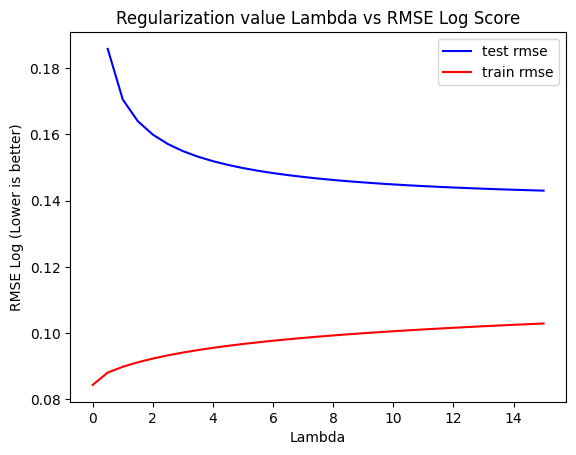

In [88]:
# Replace undefined rmse values with NaN just dont plot them
scaled_values_test = [val if val != 99999999 else np.nan for val in lambda_consts_test.values()]
scaled_values_train = [val if val != 99999999 else np.nan for val in lambda_consts_train.values()]
plt.plot(lambda_consts_test.keys(), scaled_values_test, color='blue', label='test rmse')
plt.plot(lambda_consts_test.keys(), scaled_values_train, color='red', label='train rmse')
plt.title("Regularization value Lambda vs RMSE Log Score")
plt.xlabel("Lambda")
plt.ylabel("RMSE Log (Lower is better)")
plt.legend()
plt.savefig('lambda.png')
plt.show()

In [89]:
import mlflow
mlflow.set_experiment("Assignment 1 Experiment")
mlflow.set_tracking_uri("https://dagshub.com/vvaza22/ml-assignment-1.mlflow")

with mlflow.start_run(run_name="PolynomialRegression Fine Tuned 3"):
    mlflow.log_params({
        "split_random_state": SPLIT_RANDOM_STATE,
        "split_test_size": SPLIT_TEST_SIZE,
        "scaler": "StandardScaler",
        "model_type": "PolynomialRegression",
        **params2
    })
    mlflow.log_metrics({
        "R2_TRAIN": metrics_train_2["R2"],
        "MAE_TRAIN": metrics_train_2["MAE"],
        "MSE_TRAIN": metrics_train_2["MSE"],
        "RMSE_TRAIN": metrics_train_2["RMSE"],
        "RMSE_LOG_TRAIN": metrics_train_2["RMSE_LOG"],
        "R2_TEST": metrics_test_2["R2"],
        "MAE_TEST": metrics_test_2["MAE"],
        "MSE_TEST": metrics_test_2["MSE"],
        "RMSE_TEST": metrics_test_2["RMSE"],
        "RMSE_LOG_TEST": metrics_test_2["RMSE_LOG"],
    })
    mlflow.sklearn.log_model(pipeline_model, "PolynomialRegression")
    mlflow.log_artifact("lambda.png")

2025/04/09 21:35:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run PolynomialRegression Fine Tuned 3 at: https://dagshub.com/vvaza22/ml-assignment-1.mlflow/#/experiments/0/runs/eb26b4ee7bb04117a3b4b35e8f9f89d2
🧪 View experiment at: https://dagshub.com/vvaza22/ml-assignment-1.mlflow/#/experiments/0
